# __Reading external data and plotting__

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
data=pd.read_csv("data/btc-market-price.csv")

In [8]:
data.head()

,2017-04-02 00:00:00,1099.169125
0,2017-04-03 00:00:00,1141.813000
1,2017-04-04 00:00:00,1141.600363
2,2017-04-05 00:00:00,1133.079314
3,2017-04-06 00:00:00,1196.307937
4,2017-04-07 00:00:00,1190.454250


In [9]:
data=pd.read_csv("data/btc-market-price.csv",header=None)

In [10]:
data.head()

,0,1
0,2017-04-02 00:00:00,1099.169125
1,2017-04-03 00:00:00,1141.813000
2,2017-04-04 00:00:00,1141.600363
3,2017-04-05 00:00:00,1133.079314
4,2017-04-06 00:00:00,1196.307937


In [11]:
data.columns=["Timestamp","Price"]

In [15]:
data.shape

(365, 2)

In [13]:
data.tail()

,Timestamp,Price
360,2018-03-28 00:00:00,7960.380000
361,2018-03-29 00:00:00,7172.280000
362,2018-03-30 00:00:00,6882.531667
363,2018-03-31 00:00:00,6935.480000
364,2018-04-01 00:00:00,6794.105000


In [17]:
data.dtypes

Timestamp     object
Price        float64
dtype: object

In [21]:
pd.to_datetime(data["Timestamp"]).head()

0   2017-04-02
1   2017-04-03
2   2017-04-04
3   2017-04-05
4   2017-04-06
Name: Timestamp, dtype: datetime64[ns]

In [22]:
data["Timestamp"]=pd.to_datetime(data["Timestamp"])

In [23]:
data.dtypes

Timestamp    datetime64[ns]
Price               float64
dtype: object

In [24]:
data.set_index("Timestamp",inplace=True)

In [26]:
data.head()

,Price
Timestamp,
2017-04-02,1099.169125
2017-04-03,1141.813000
2017-04-04,1141.600363
2017-04-05,1133.079314
2017-04-06,1196.307937


In [29]:
data.loc["2017-12-12"]

Price    17276.393333
Name: 2017-12-12 00:00:00, dtype: float64

## __Putting Everything together__

In [34]:
data=pd.read_csv("data/btc-market-price.csv",header=None)
data.columns=["Timestamp","Price"]
data["Timestamp"]=pd.to_datetime(data["Timestamp"])
data.set_index("Timestamp",inplace=True)

In [10]:
data.head()

,Price
Timestamp,
2017-04-02,1099.169125
2017-04-03,1141.813000
2017-04-04,1141.600363
2017-04-05,1133.079314
2017-04-06,1196.307937


### __Everything can be done in the read_csv function__ too 

In [2]:
data=pd.read_csv(
    "data/btc-market-price.csv",
    header=None,
    names=['Timestamp','Price'],
    index_col=0,
    parse_dates=True
)

In [37]:
data.head()

,Price
Timestamp,
2017-04-02,1099.169125
2017-04-03,1141.813000
2017-04-04,1141.600363
2017-04-05,1133.079314
2017-04-06,1196.307937


# __Basics of Plotting__ 

<Axes: xlabel='Timestamp'>

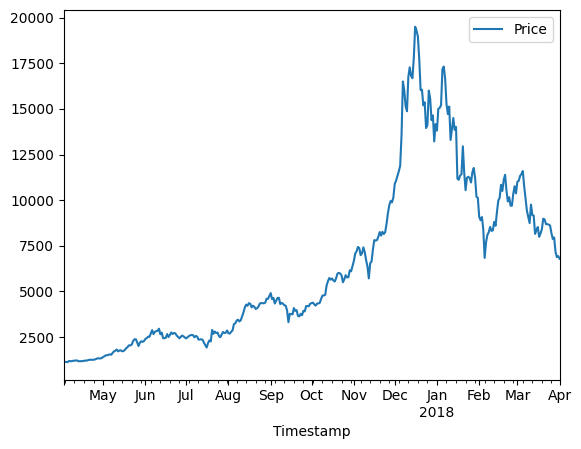

In [12]:
data.plot()

We can create similar graph using plt.plot() funtion plt.plot() take mainly two parameters which are the values of X and Y. In the exam below data.index=X and data['Price']=Y and **plt.plot(value of X axes, Value of Y axes)**


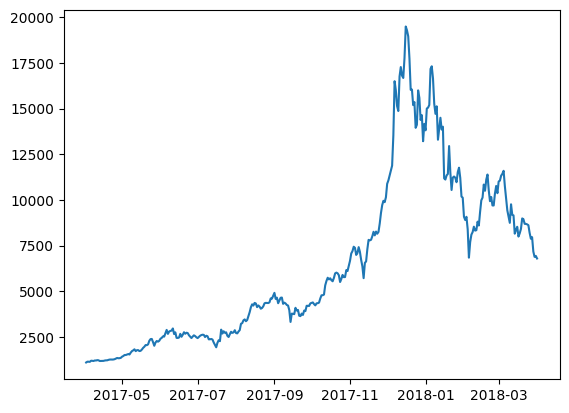

In [16]:
plt.plot(data.index,data['Price']) 

In [3]:
X=np.arange(-10,0)

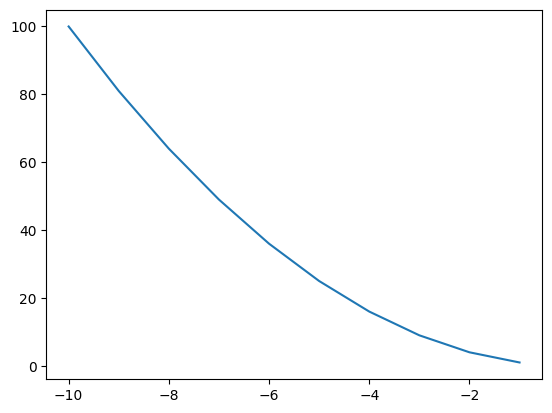

In [19]:
plt.plot(X,X**2)

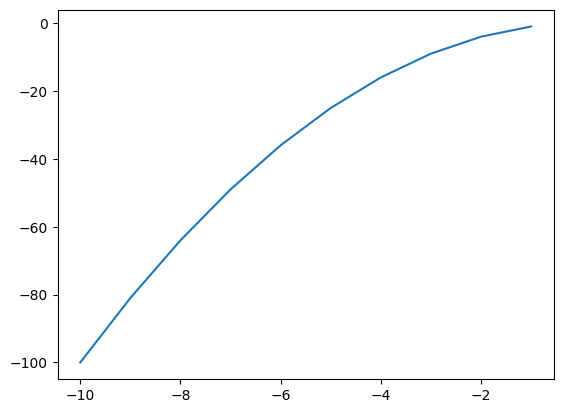

In [4]:
plt.plot(X,-1*(X**2))

Text(0.5, 1.0, 'My Nice plot')

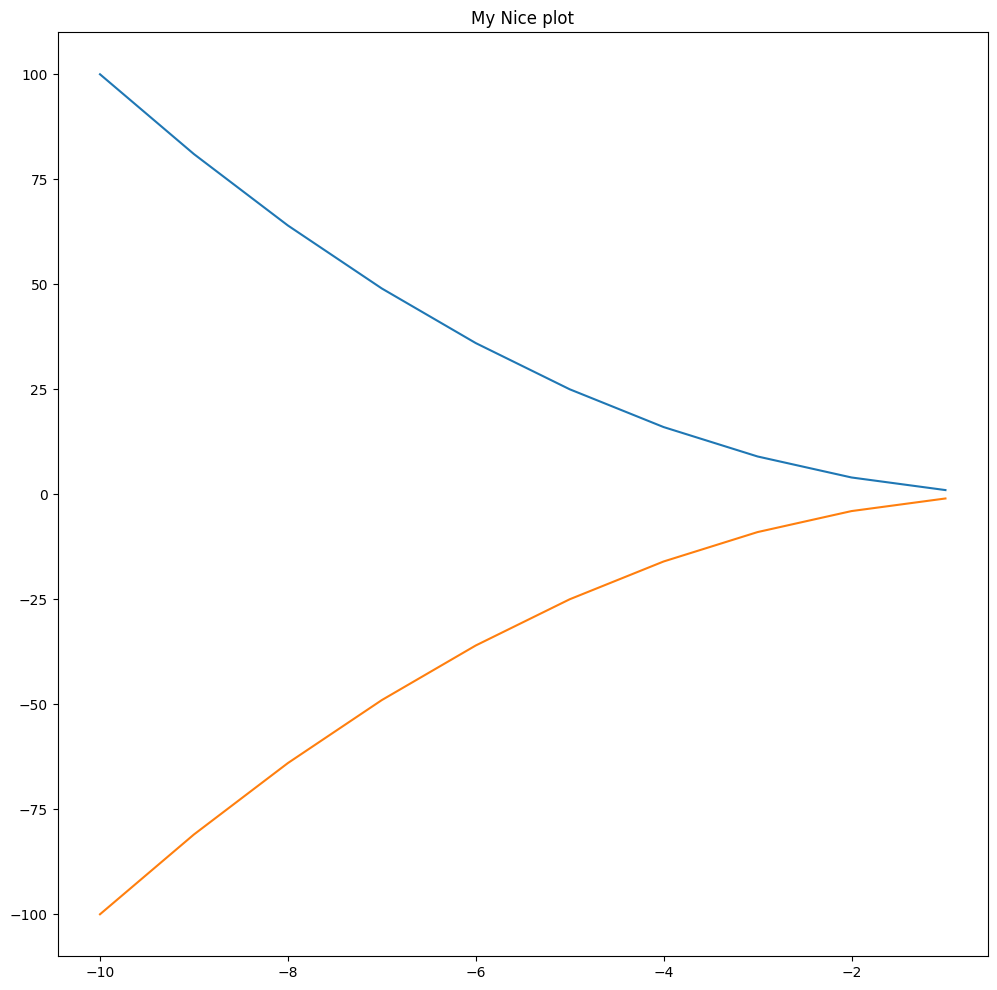

In [14]:
plt.figure(figsize=(12,12)) #(width,height)
plt.plot(X,X**2)
plt.plot(X,-1*(X**2))
plt.title('My Nice plot')

<Axes: title={'center': 'Bitcoin price 2017-2018'}, xlabel='Timestamp'>

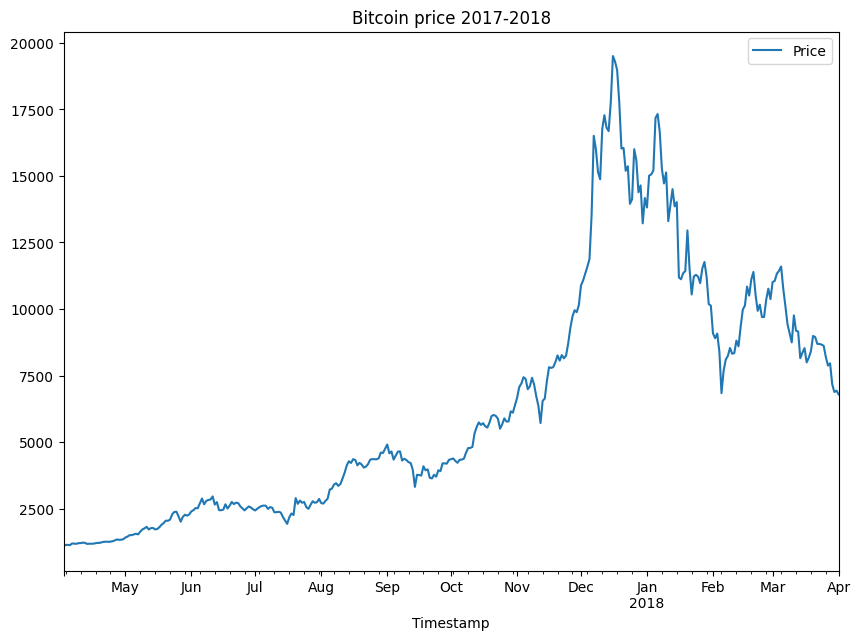

In [16]:
data.plot(figsize=(10,7), title='Bitcoin price 2017-2018')

In [38]:
eth=pd.read_csv(
        'data/eth-price.csv',
    )

In [39]:
eth.dtypes

Date(UTC)         object
UnixTimeStamp      int64
Value            float64
dtype: object

We can see that the parse_date didn't convert the Date and UnixTimeStamp column. It is because the parse_date function only parses the index. For other colunns we need to convert it explicitly using **pd.to_datatime(Column Name)** function.

In [40]:
eth.head()

,Date(UTC),UnixTimeStamp,Value
0,4/2/2017,1491091200,48.55
1,4/3/2017,1491177600,44.13
2,4/4/2017,1491264000,44.43
3,4/5/2017,1491350400,44.90
4,4/6/2017,1491436800,43.23


In [43]:
pd.to_datetime(eth['UnixTimeStamp']).head()

0   1970-01-01 00:00:01.491091200
1   1970-01-01 00:00:01.491177600
2   1970-01-01 00:00:01.491264000
3   1970-01-01 00:00:01.491350400
4   1970-01-01 00:00:01.491436800
Name: UnixTimeStamp, dtype: datetime64[ns]

So to combine the bitcoin-price.csv and the eth-coin.csv the **UnixTimeStamp** precision is the problem so we need to parse **Date(UTC)** and remoce **UnixTimeStamp** precision

In [41]:
eth['Date(UTC)']=pd.to_datetime(eth['Date(UTC)'])

In [42]:
eth['Date(UTC)'].head()

0   2017-04-02
1   2017-04-03
2   2017-04-04
3   2017-04-05
4   2017-04-06
Name: Date(UTC), dtype: datetime64[ns]

In [46]:
pd.read_csv('data/eth-price.csv', parse_dates=[0]).dtypes

Date(UTC)        datetime64[ns]
UnixTimeStamp             int64
Value                   float64
dtype: object

**parse_dates: bool, list of Hashable, list of lists or dict of {Hashablelist}, default False** above we sent a list of int (0) it will try parsing the column 0.

__*NOTE:*__ Index columns is not considered a columns so the index 0 is the first column after index column.

## Now lets put everything together

In [49]:
eth=pd.read_csv(
    'data/eth-price.csv',
    parse_dates=True,
    index_col=0
)

In [50]:
eth.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 362 entries, 2017-04-02 to 2018-04-01
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   UnixTimeStamp  362 non-null    int64  
 1   Value          362 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 8.5 KB


In [51]:
eth.head()

,UnixTimeStamp,Value
Date(UTC),,
2017-04-02,1491091200,48.55
2017-04-03,1491177600,44.13
2017-04-04,1491264000,44.43
2017-04-05,1491350400,44.90
2017-04-06,1491436800,43.23


We can now combine both DataFrames into one. Both have the same index, so aligning both prices will be easy. Let's first create an empty DataFrame and with the index from Bitcoin prices:

In [52]:
prices=pd.DataFrame(index=data.index)

In [53]:
prices.head()

""
Timestamp
2017-04-02
2017-04-03
2017-04-04
2017-04-05
2017-04-06


In [57]:
prices['Bitcoin']=data['Price']

In [59]:
prices['Ether']=eth['Value']

In [60]:
prices.head()

,Bitcoin,Ether
Timestamp,,
2017-04-02,1099.169125,48.55
2017-04-03,1141.813000,44.13
2017-04-04,1141.600363,44.43
2017-04-05,1133.079314,44.90
2017-04-06,1196.307937,43.23


**We have sucessfully combines the two dataframes.** Now lets try to plot them.

<Axes: xlabel='Timestamp'>

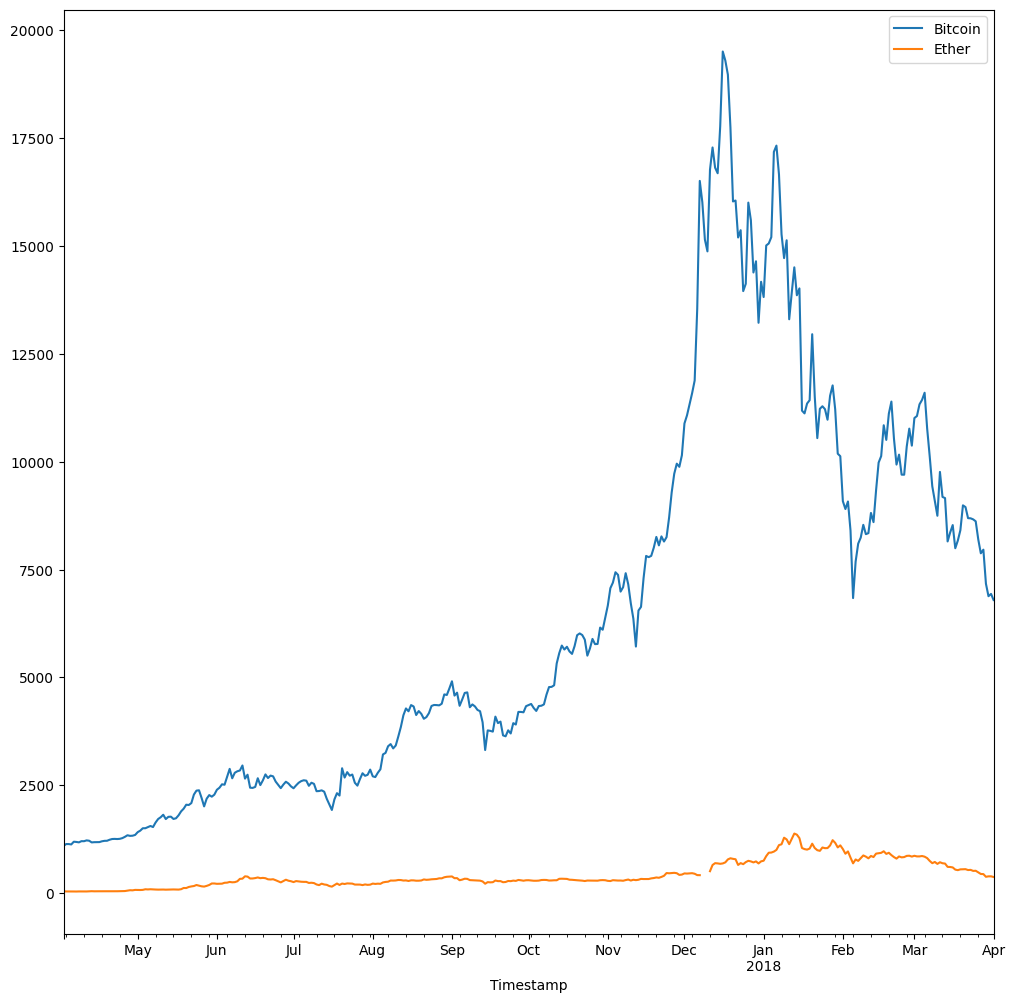

In [61]:
prices.plot(figsize=(12,12))

<Axes: xlabel='Timestamp'>

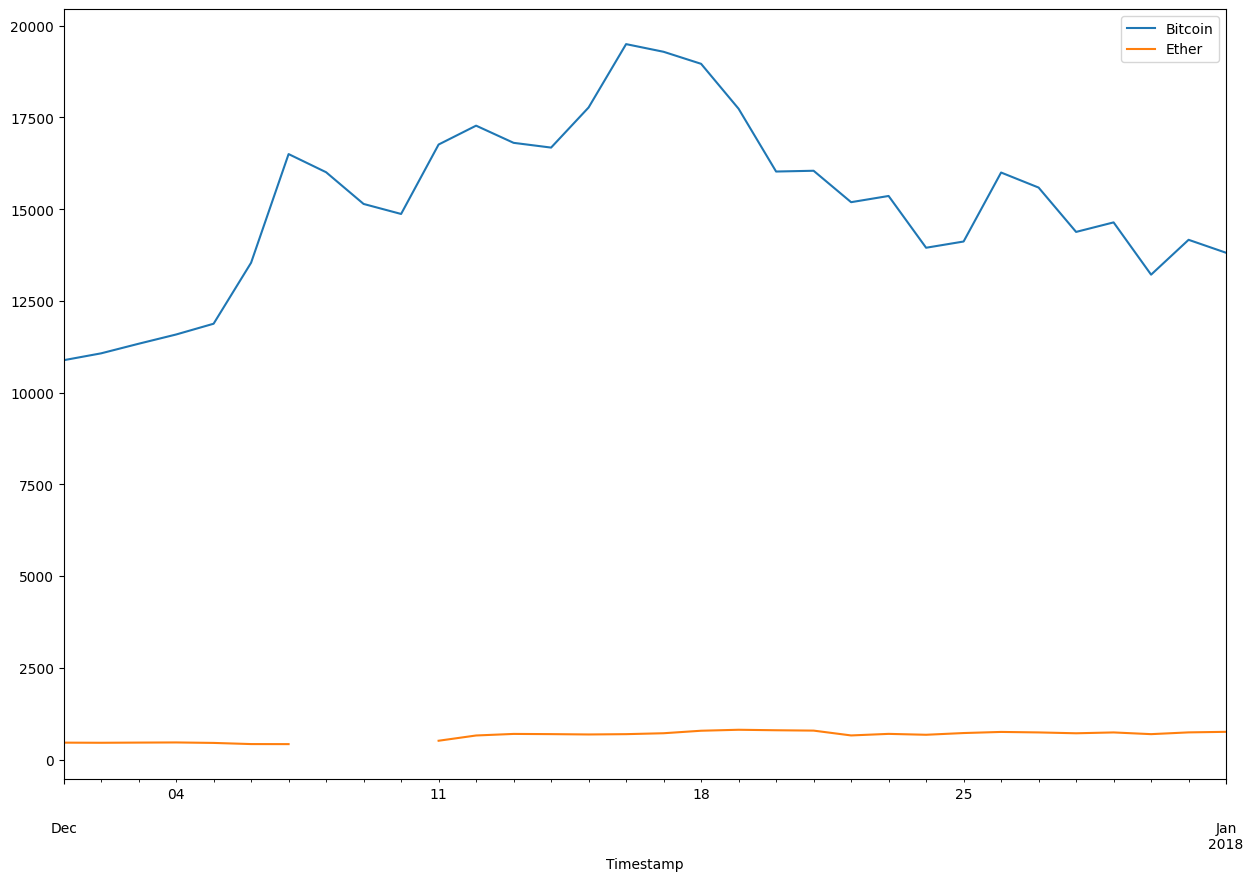

In [62]:
prices.loc['2017-12-01':'2018-01-01'].plot(figsize=(15,10))